In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT/SlicesCropped/1B-85-crop/"

# Filenames
image_files = ["1B-150-85kv.png","1B-200-85kv.png","1B-250-85kv.png","1B-300-85kv.png","1B-350-85kv.png","1B-400-85kv.png",
               "1B-450-85kv.png","1B-500-85kv.png","1B-550-85kv.png","1B-600-85kv.png","1B-650-85kv.png","1B-700-85kv.png","1B-750-85kv.png",
               "1B-800-85kv.png","1B-850-85kv.png","1B-900-85kv.png"]
#serpentine
#lower_threshold = 54
#upper_threshold = 55

#Carbonate
lower_threshold = 60
upper_threshold = 61

# Create a figure for the images and overlays
plt.figure(figsize=(12, 9 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a color overlay with transparency
    overlay = np.zeros((*ct_array.shape, 3), dtype=np.uint8)  # Create an RGB image
    overlay[..., 0] = 255  # Red channel for the overlay
    overlay[~segmented_mask] = 0  # Set non-segmented areas to black
    
    # Combine original image and overlay using alpha blending
    alpha = 0.5  # Transparency level (0 = fully transparent, 1 = fully opaque)
    overlayed_image = np.dstack([ct_array] * 3)  # Convert grayscale to RGB
    overlayed_image = overlayed_image * (1 - alpha) + overlay * alpha
    
    # Plot the original, segmented, and overlayed images
    plt.subplot(len(image_files), 3, 3 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 2)
    plt.imshow(segmented_mask, cmap="gray")
    plt.title(f"Segmented Mask ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 3)
    plt.imshow(overlayed_image.astype(np.uint8))
    plt.title(f"Overlayed Image")
    plt.axis("off")

plt.tight_layout()
#plt.savefig('1A-85-350-segmented(40-41).png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anna/Desktop/XCT/SlicesCropped/1B-85-crop/1B-150-85kv.png'

<Figure size 1200x14400 with 0 Axes>

In [19]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT/SlicesCropped/1B-85-crop/"

# Filenames
image_files = ["1B-150-85kv.png","1B-200-85kv.png","1B-250-85kv.png","1B-300-85kv.png","1B-350-85kv.png","1B-400-85kv.png",
               "1B-450-85kv.png","1B-500-85kv.png","1B-550-85kv.png","1B-600-85kv.png","1B-650-85kv.png","1B-700-85kv.png","1B-750-85kv.png",
               "1B-800-85kv.png","1B-850-85kv.png","1B-900-85kv.png"]

# Intensity threshold
lower_threshold = 60
upper_threshold = 61

total_core_pixels = 0
total_core_segmented_pixels = 0

# Loop through each image file
for image_file in image_files:
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Calculate percentage
    total_pixels = ct_array.size
    segmented_pixels = np.sum(segmented_mask)
    percentage = (segmented_pixels / total_pixels) * 100
    
    print(f"Image: {image_file} - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {percentage:.2f}%")
    
    # Accumulate totals for entire core
    total_core_pixels += total_pixels
    total_core_segmented_pixels += segmented_pixels

# Calculate overall percentage for the entire core
if total_core_pixels > 0:
    total_core_percentage = (total_core_segmented_pixels / total_core_pixels) * 100
    print(f"Total Core - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {total_core_percentage:.2f}%")


Image: 1B-150-85kv.png - Percentage of pixels in range 60-61: 0.36%
Image: 1B-200-85kv.png - Percentage of pixels in range 60-61: 0.69%
Image: 1B-250-85kv.png - Percentage of pixels in range 60-61: 0.98%
Image: 1B-300-85kv.png - Percentage of pixels in range 60-61: 0.62%
Image: 1B-350-85kv.png - Percentage of pixels in range 60-61: 0.64%
Image: 1B-400-85kv.png - Percentage of pixels in range 60-61: 0.63%
Image: 1B-450-85kv.png - Percentage of pixels in range 60-61: 0.64%
Image: 1B-500-85kv.png - Percentage of pixels in range 60-61: 0.47%
Image: 1B-550-85kv.png - Percentage of pixels in range 60-61: 0.45%
Image: 1B-600-85kv.png - Percentage of pixels in range 60-61: 0.64%
Image: 1B-650-85kv.png - Percentage of pixels in range 60-61: 0.63%
Image: 1B-700-85kv.png - Percentage of pixels in range 60-61: 0.77%
Image: 1B-750-85kv.png - Percentage of pixels in range 60-61: 0.73%
Image: 1B-800-85kv.png - Percentage of pixels in range 60-61: 0.70%
Image: 1B-850-85kv.png - Percentage of pixels in

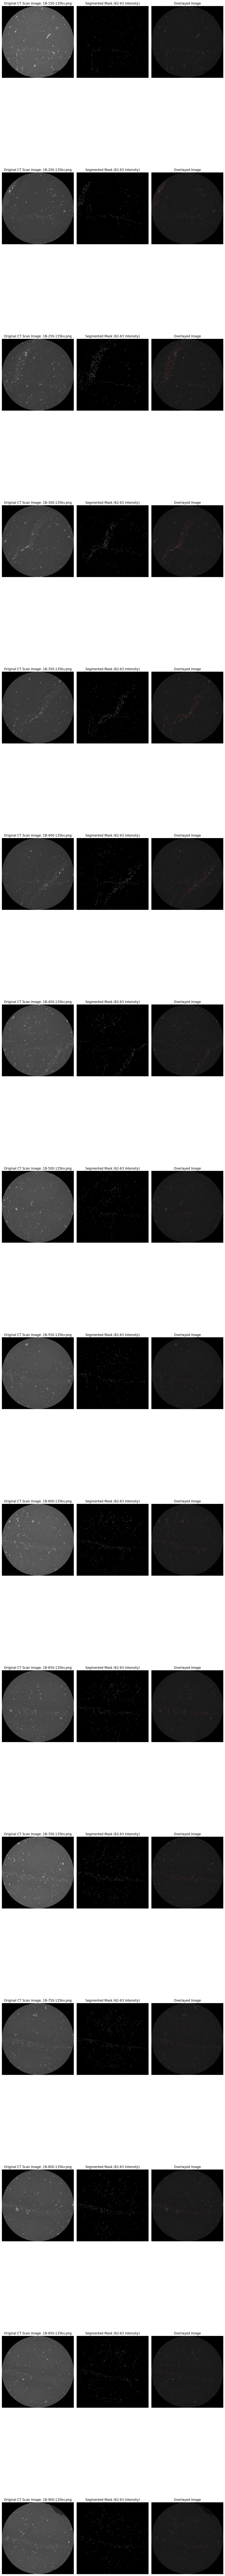

In [14]:
#Sample 2 has a relatively high amount of fracture-filling carbonate mineralization occurring in the sample

# Folder path
folder_path = "/Users/anna/Desktop/XCT/SlicesCropped/1B-135-crop/"

# Filenames
image_files = ["1B-150-135kv.png","1B-200-135kv.png","1B-250-135kv.png","1B-300-135kv.png","1B-350-135kv.png","1B-400-135kv.png",
               "1B-450-135kv.png","1B-500-135kv.png","1B-550-135kv.png","1B-600-135kv.png","1B-650-135kv.png","1B-700-135kv.png","1B-750-135kv.png",
               "1B-800-135kv.png","1B-850-135kv.png","1B-900-135kv.png"]
#serpentine
#lower_threshold = 54
#upper_threshold = 55

#Carbonate
lower_threshold = 62
upper_threshold = 63

# Create a figure for the images and overlays
plt.figure(figsize=(12, 9 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a color overlay with transparency
    overlay = np.zeros((*ct_array.shape, 3), dtype=np.uint8)  # Create an RGB image
    overlay[..., 0] = 255  # Red channel for the overlay
    overlay[~segmented_mask] = 0  # Set non-segmented areas to black
    
    # Combine original image and overlay using alpha blending
    alpha = 0.5  # Transparency level (0 = fully transparent, 1 = fully opaque)
    overlayed_image = np.dstack([ct_array] * 3)  # Convert grayscale to RGB
    overlayed_image = overlayed_image * (1 - alpha) + overlay * alpha
    
    # Plot the original, segmented, and overlayed images
    plt.subplot(len(image_files), 3, 3 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 2)
    plt.imshow(segmented_mask, cmap="gray")
    plt.title(f"Segmented Mask ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 3)
    plt.imshow(overlayed_image.astype(np.uint8))
    plt.title(f"Overlayed Image")
    plt.axis("off")

plt.tight_layout()
#plt.savefig('1A-85-350-segmented(40-41).png')
plt.show()

In [31]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT/SlicesCropped/1B-135-crop/"

# Filenames
image_files = ["1B-150-135kv.png","1B-200-135kv.png","1B-250-135kv.png","1B-300-135kv.png","1B-350-135kv.png","1B-400-135kv.png",
               "1B-450-135kv.png","1B-500-135kv.png","1B-550-135kv.png","1B-600-135kv.png","1B-650-135kv.png","1B-700-135kv.png","1B-750-135kv.png",
               "1B-800-135kv.png","1B-850-135kv.png","1B-900-135kv.png"]

# Intensity threshold
lower_threshold = 61
upper_threshold = 62

total_core_pixels = 0
total_core_segmented_pixels = 0

# Loop through each image file
for image_file in image_files:
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Calculate percentage
    total_pixels = ct_array.size
    segmented_pixels = np.sum(segmented_mask)
    percentage = (segmented_pixels / total_pixels) * 100
    
    print(f"Image: {image_file} - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {percentage:.2f}%")
    
    # Accumulate totals for entire core
    total_core_pixels += total_pixels
    total_core_segmented_pixels += segmented_pixels

# Calculate overall percentage for the entire core
if total_core_pixels > 0:
    total_core_percentage = (total_core_segmented_pixels / total_core_pixels) * 100
    print(f"Total Core - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {total_core_percentage:.2f}%")

Image: 1B-150-135kv.png - Percentage of pixels in range 61-62: 0.38%
Image: 1B-200-135kv.png - Percentage of pixels in range 61-62: 0.60%
Image: 1B-250-135kv.png - Percentage of pixels in range 61-62: 0.99%
Image: 1B-300-135kv.png - Percentage of pixels in range 61-62: 0.75%
Image: 1B-350-135kv.png - Percentage of pixels in range 61-62: 0.78%
Image: 1B-400-135kv.png - Percentage of pixels in range 61-62: 0.84%
Image: 1B-450-135kv.png - Percentage of pixels in range 61-62: 0.77%
Image: 1B-500-135kv.png - Percentage of pixels in range 61-62: 0.65%
Image: 1B-550-135kv.png - Percentage of pixels in range 61-62: 0.73%
Image: 1B-600-135kv.png - Percentage of pixels in range 61-62: 0.92%
Image: 1B-650-135kv.png - Percentage of pixels in range 61-62: 0.95%
Image: 1B-700-135kv.png - Percentage of pixels in range 61-62: 1.08%
Image: 1B-750-135kv.png - Percentage of pixels in range 61-62: 1.06%
Image: 1B-800-135kv.png - Percentage of pixels in range 61-62: 0.97%
Image: 1B-850-135kv.png - Percenta

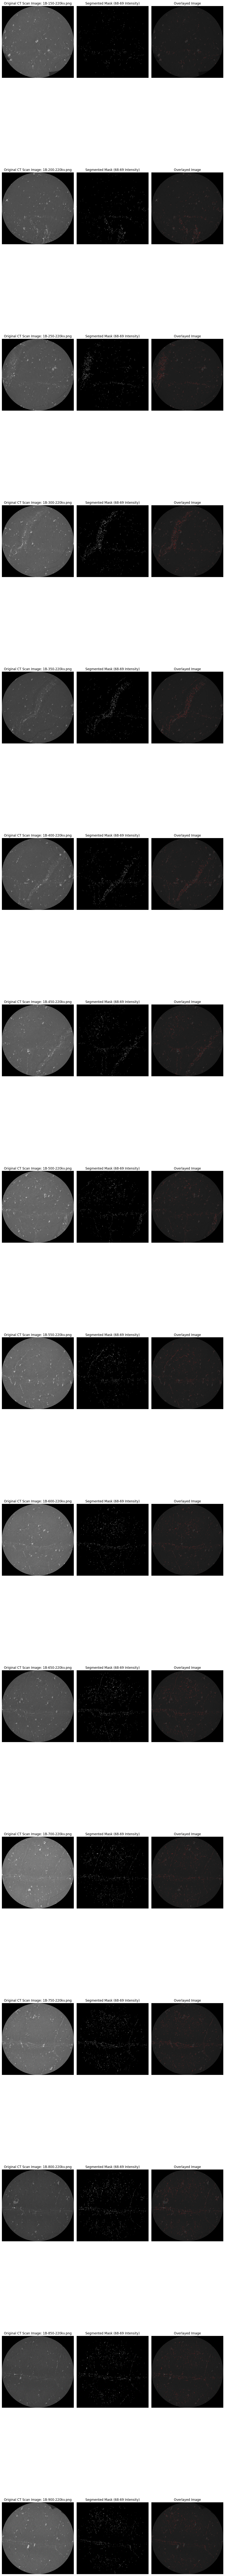

In [15]:
# Folder path
folder_path = "/Users/anna/Desktop/XCT/SlicesCropped/1B-220-crop/"

# Filenames
image_files = ["1B-150-220kv.png","1B-200-220kv.png","1B-250-220kv.png","1B-300-220kv.png","1B-350-220kv.png","1B-400-220kv.png",
               "1B-450-220kv.png","1B-500-220kv.png","1B-550-220kv.png","1B-600-220kv.png","1B-650-220kv.png","1B-700-220kv.png","1B-750-220kv.png",
               "1B-800-220kv.png","1B-850-220kv.png","1B-900-220kv.png"]
#serpentine
#lower_threshold = 54
#upper_threshold = 55

#Carbonate
lower_threshold = 68
upper_threshold = 69

# Create a figure for the images and overlays
plt.figure(figsize=(12, 9 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Create a color overlay with transparency
    overlay = np.zeros((*ct_array.shape, 3), dtype=np.uint8)  # Create an RGB image
    overlay[..., 0] = 255  # Red channel for the overlay
    overlay[~segmented_mask] = 0  # Set non-segmented areas to black
    
    # Combine original image and overlay using alpha blending
    alpha = 0.5  # Transparency level (0 = fully transparent, 1 = fully opaque)
    overlayed_image = np.dstack([ct_array] * 3)  # Convert grayscale to RGB
    overlayed_image = overlayed_image * (1 - alpha) + overlay * alpha
    
    # Plot the original, segmented, and overlayed images
    plt.subplot(len(image_files), 3, 3 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"Original CT Scan Image: {image_file}")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 2)
    plt.imshow(segmented_mask, cmap="gray")
    plt.title(f"Segmented Mask ({lower_threshold}-{upper_threshold} Intensity)")
    plt.axis("off")
    
    plt.subplot(len(image_files), 3, 3 * i + 3)
    plt.imshow(overlayed_image.astype(np.uint8))
    plt.title(f"Overlayed Image")
    plt.axis("off")

plt.tight_layout()
#plt.savefig('1A-85-350-segmented(40-41).png')
plt.show()

In [3]:
# Folder path
folder_path = "/Users/anna/Desktop/X-RayCT/SlicesCropped/1B-220-crop/"

# Filenames
image_files = ["1B-150-220kv.png","1B-200-220kv.png","1B-250-220kv.png","1B-300-220kv.png","1B-350-220kv.png","1B-400-220kv.png",
               "1B-450-220kv.png","1B-500-220kv.png","1B-550-220kv.png","1B-600-220kv.png","1B-650-220kv.png","1B-700-220kv.png","1B-750-220kv.png",
               "1B-800-220kv.png","1B-850-220kv.png","1B-900-220kv.png"]
# Intensity threshold
lower_threshold = 68
upper_threshold = 69

total_core_pixels = 0
total_core_segmented_pixels = 0

# Loop through each image file
for image_file in image_files:
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Calculate percentage
    total_pixels = ct_array.size
    segmented_pixels = np.sum(segmented_mask)
    percentage = (segmented_pixels / total_pixels) * 100
    
    print(f"Image: {image_file} - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {percentage:.2f}%")
    
    # Accumulate totals for entire core
    total_core_pixels += total_pixels
    total_core_segmented_pixels += segmented_pixels

# Calculate overall percentage for the entire core
if total_core_pixels > 0:
    total_core_percentage = (total_core_segmented_pixels / total_core_pixels) * 100
    print(f"Total Core - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {total_core_percentage:.2f}%")

Image: 1B-150-220kv.png - Percentage of pixels in range 68-69: 0.25%
Image: 1B-200-220kv.png - Percentage of pixels in range 68-69: 0.47%
Image: 1B-250-220kv.png - Percentage of pixels in range 68-69: 0.66%
Image: 1B-300-220kv.png - Percentage of pixels in range 68-69: 0.79%
Image: 1B-350-220kv.png - Percentage of pixels in range 68-69: 0.67%
Image: 1B-400-220kv.png - Percentage of pixels in range 68-69: 0.70%
Image: 1B-450-220kv.png - Percentage of pixels in range 68-69: 0.69%
Image: 1B-500-220kv.png - Percentage of pixels in range 68-69: 0.65%
Image: 1B-550-220kv.png - Percentage of pixels in range 68-69: 0.68%
Image: 1B-600-220kv.png - Percentage of pixels in range 68-69: 0.71%
Image: 1B-650-220kv.png - Percentage of pixels in range 68-69: 0.89%
Image: 1B-700-220kv.png - Percentage of pixels in range 68-69: 0.83%
Image: 1B-750-220kv.png - Percentage of pixels in range 68-69: 0.97%
Image: 1B-800-220kv.png - Percentage of pixels in range 68-69: 0.90%
Image: 1B-850-220kv.png - Percenta

In [4]:
# Folder path
folder_path = "/Users/anna/Desktop/X-RayCT/SlicesCropped/1B-220-crop/"

# Filenames
image_files = ["1B-150-220kv.png","1B-200-220kv.png","1B-250-220kv.png","1B-300-220kv.png","1B-350-220kv.png","1B-400-220kv.png",
               "1B-450-220kv.png","1B-500-220kv.png","1B-550-220kv.png","1B-600-220kv.png","1B-650-220kv.png","1B-700-220kv.png","1B-750-220kv.png",
               "1B-800-220kv.png","1B-850-220kv.png","1B-900-220kv.png"]
# Intensity threshold
lower_threshold = 68
upper_threshold = 69

total_core_pixels = 0
total_core_segmented_pixels = 0

# Loop through each image file
for image_file in image_files:
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Mask to exclude black pixels
    valid_pixels_mask = ct_array > 0

    # Mask for the segmented region within valid pixels
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold) & valid_pixels_mask

    # Count pixels
    total_valid_pixels = np.sum(valid_pixels_mask)
    segmented_pixels = np.sum(segmented_mask)
    
    # Calculate percentage
    percentage = (segmented_pixels / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    
    print(f"Image: {image_file} - % in range {lower_threshold}-{upper_threshold} (excluding black): {percentage:.2f}%")
    
    # Accumulate totals for entire core
    total_core_pixels += total_valid_pixels
    total_core_segmented_pixels += segmented_pixels

# Calculate overall percentage for the entire core
if total_core_pixels > 0:
    total_core_percentage = (total_core_segmented_pixels / total_core_pixels) * 100
    print(f"\nTotal Core - % of pixels in range {lower_threshold}-{upper_threshold} (excluding black): {total_core_percentage:.2f}%")

Image: 1B-150-220kv.png - % in range 68-69 (excluding black): 0.31%
Image: 1B-200-220kv.png - % in range 68-69 (excluding black): 0.59%
Image: 1B-250-220kv.png - % in range 68-69 (excluding black): 0.84%
Image: 1B-300-220kv.png - % in range 68-69 (excluding black): 1.01%
Image: 1B-350-220kv.png - % in range 68-69 (excluding black): 0.85%
Image: 1B-400-220kv.png - % in range 68-69 (excluding black): 0.89%
Image: 1B-450-220kv.png - % in range 68-69 (excluding black): 0.87%
Image: 1B-500-220kv.png - % in range 68-69 (excluding black): 0.83%
Image: 1B-550-220kv.png - % in range 68-69 (excluding black): 0.87%
Image: 1B-600-220kv.png - % in range 68-69 (excluding black): 0.90%
Image: 1B-650-220kv.png - % in range 68-69 (excluding black): 1.13%
Image: 1B-700-220kv.png - % in range 68-69 (excluding black): 1.06%
Image: 1B-750-220kv.png - % in range 68-69 (excluding black): 1.23%
Image: 1B-800-220kv.png - % in range 68-69 (excluding black): 1.14%
Image: 1B-850-220kv.png - % in range 68-69 (excl